# Rodrigo Burberg 
# Project 3 - Travel Package Purchase Prediction

Description
Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

Objective

* To predict which customer is more likely to purchase the newly introduced travel package.

Data Dictionary

Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Product taken flag
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisited: Total number of person came with customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of the trip in a year by customer
* Passport: The customer has passport or not
* OwnCar: Customers owns a car flag
* NumberOfChildrenVisited: Total number of children with age less than 5 visit with customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfactory score
* ProductPitched: Product pitched by a salesperson
* NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
* DurationOfPitch: Duration of the pitch by a salesman to customer

Best Practices for Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
The notebook should be submitted as an HTML file (.html) and as a notebook file (.ipynb)

In [264]:
# Import Libraries 



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

In [265]:
tourData = pd.read_csv("Tourism.csv")


tourData.head(10) 

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [266]:
tourData.shape

(4888, 20)

In [267]:
tourData.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [268]:
tourData.nunique()

#unique values of features

CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

**Age, Duration of Pitch, Number of Trips, and Monthly Income will be treated as continous variables**

**NumberOfPersonVisited, NumberOfFollowups, and NumberOfChildrenVisited will be treated as categorical values since they have very few unique values**

In [269]:
tourData.isnull().values.any() # there are null values 

True

In [270]:
tourData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [271]:
tourData['Age'] = tourData['Age'].fillna((tourData['Age'].mean())) #replaced null values of age with mean age value 

In [272]:
tourData.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.098418,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,37.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [273]:
tourData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4888 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [274]:
## The most important variable is ProdTaken, since this will let us if a customer actually purchased a package  

In [275]:
#EDA 

# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram




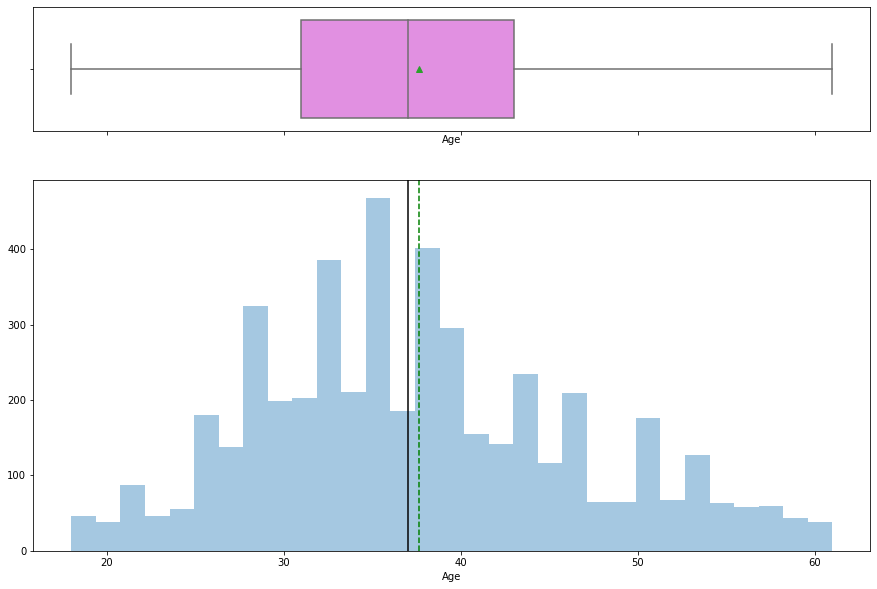

In [276]:
#AGE OBSERVATIONS


 
#Null values of 'Age' were replaced by the mean value 

#Mean and Median values are very close around 37.5

#There are no outliers and the graph shows a fairly normal distribution with a slight skewness to the left
    
#In general customers that bought the packages are younger than those that did not 




histogram_boxplot(tourData['Age'])

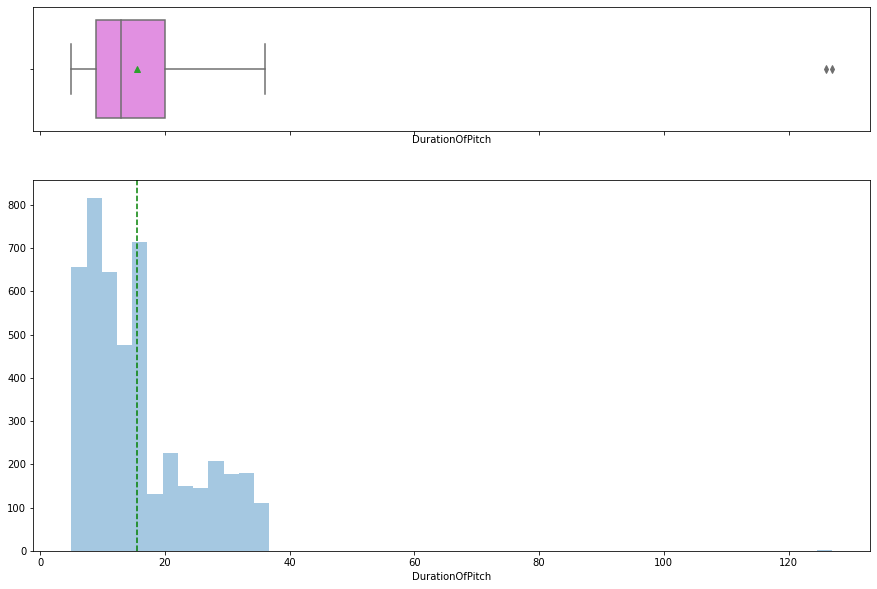

In [277]:
#Duration of Pitch Observations



histogram_boxplot(tourData['DurationOfPitch'])


In [278]:
#Duration of Pitch 

#data is positivly skewed the 25th and 75th percentile lies between 9-20 min 

#The mean and median are fairly close to each other 

#There are 2 outliers which will be replaced with the mean value



In [279]:
#replacing outlier values with mean 

tourData.loc[tourData['DurationOfPitch'] > 120 ]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
1434,201434,0,37.622265,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,203878,0,53.000000,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


In [280]:
tourData["DurationOfPitch"] = np.where(tourData["DurationOfPitch"] >120, 15.49 ,tourData['DurationOfPitch'])

#replaced outlier values with mean of 15.49 (from describe function)

In [281]:
tourData.loc[tourData['DurationOfPitch'] > 120 ] #verifying that outliers were replaced 

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [282]:
#Replacing null values of 'Duration of Pitch' with mean of 15.49 from describe function 

tourData['DurationOfPitch'] = tourData['DurationOfPitch'].replace(np.nan, 15.49)



In [283]:
tourData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4888 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4888 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

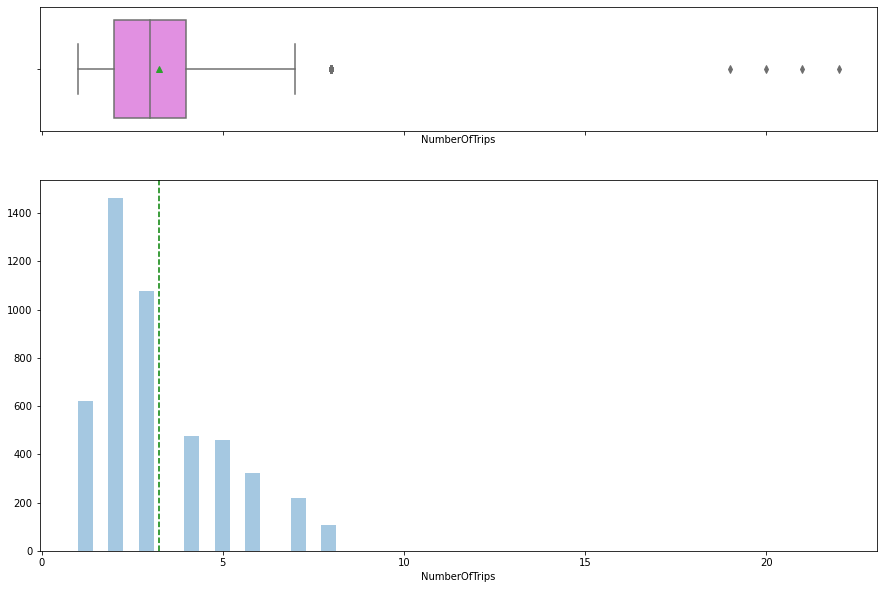

In [284]:
#NUmber of Trips Observations 

histogram_boxplot(tourData['NumberOfTrips'])



In [285]:
tourData.loc[tourData['NumberOfTrips'] > 10 ]




,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
385,200385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,200816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,202829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,203260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0


* Will leave outliers since there are several things in common with them such as Gender = Male ,Martial Status = Single or Unmmaried, CityTier = 1, Age = 30-40, and OwnCar = 1 

* The Data is postively skewed; mean and median are close to each other


In [286]:
tourData['NumberOfTrips'] = tourData['NumberOfTrips'].replace(np.nan, 0)



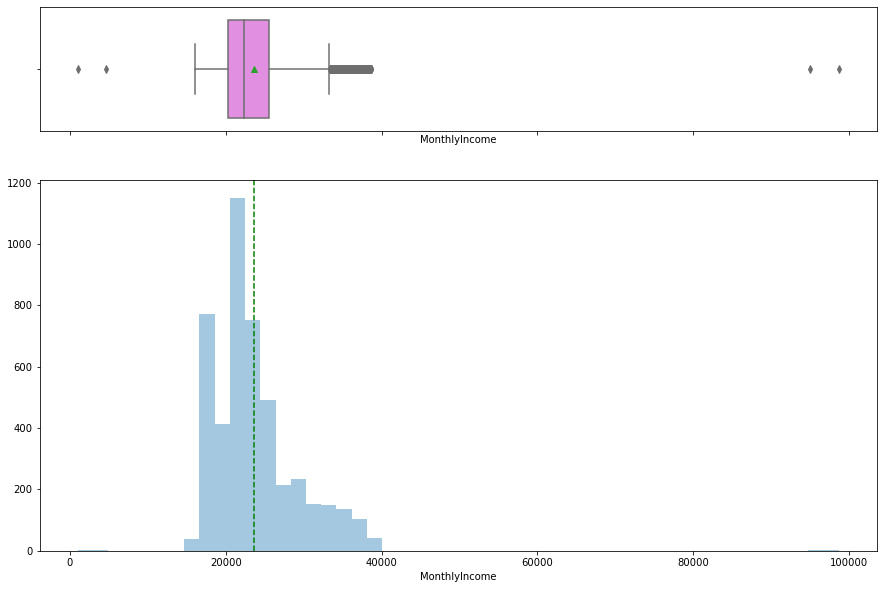

In [287]:
#Monthly Income Observations 

histogram_boxplot(tourData['MonthlyIncome'])


Data is positively skewed; there is a large number of outliers, especially within outside the 75th percentile 

In [288]:
#Replacing null values of 'MonthlyIncome' with mean of 23619.85 from describe function 

tourData['MonthlyIncome'] = tourData['MonthlyIncome'].replace(np.nan, 23619.85)


In [289]:
tourData.loc[tourData['MonthlyIncome'] > 23619.85 ] 

#there are 1163 customers which are outside the 75th percentile, but there are 2 extreme outliers 



,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2482,202482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0


In [290]:
tourData = tourData.loc[tourData["MonthlyIncome"] < 90000] #dropped the 2 extreme outliers 

tourData

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.000000,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.000000,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.000000,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.000000,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [291]:
#dropped the 2 extreme outliers 

***We have performed all the univariate analysis, next we will perform the bivariate comparing the Product Taken vs everything else ***

In [292]:
tourData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4886 non-null   int64  
 1   ProdTaken                4886 non-null   int64  
 2   Age                      4886 non-null   float64
 3   TypeofContact            4861 non-null   object 
 4   CityTier                 4886 non-null   int64  
 5   DurationOfPitch          4886 non-null   float64
 6   Occupation               4886 non-null   object 
 7   Gender                   4886 non-null   object 
 8   NumberOfPersonVisited    4886 non-null   int64  
 9   NumberOfFollowups        4841 non-null   float64
 10  ProductPitched           4886 non-null   object 
 11  PreferredPropertyStar    4861 non-null   float64
 12  MaritalStatus            4886 non-null   object 
 13  NumberOfTrips            4886 non-null   float64
 14  Passport                

In [293]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

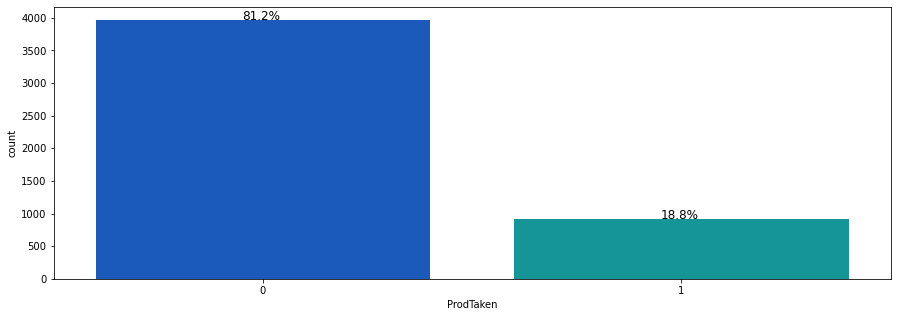

In [294]:
#ProdTaken Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["ProdTaken"],palette='winter')
perc_on_bar(ax,tourData["ProdTaken"])

18.8% bought a package - More insight can be drawn from bivariate analysis

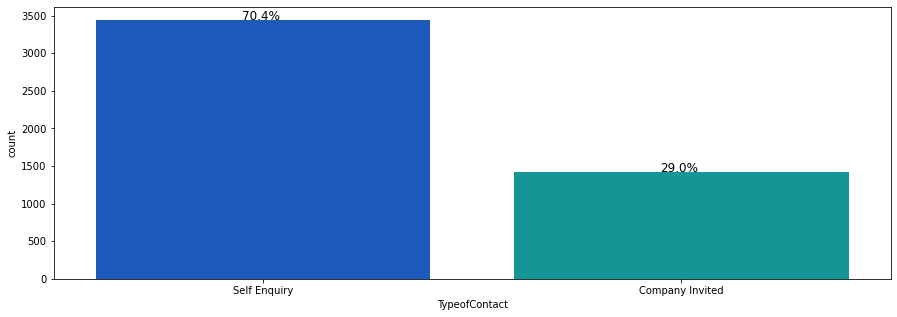

In [296]:
#TypeofContact Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["TypeofContact"],palette='winter')
perc_on_bar(ax,tourData["TypeofContact"])

70.4% were Self Enquiry 
29.0% were Company Invited 

from describe function we can see there are null values which can't be replaced with mean value since it is categorical data, will drop the null values. 

In [297]:
tourData.dropna(subset=['TypeofContact'], inplace=True) #dropped null values

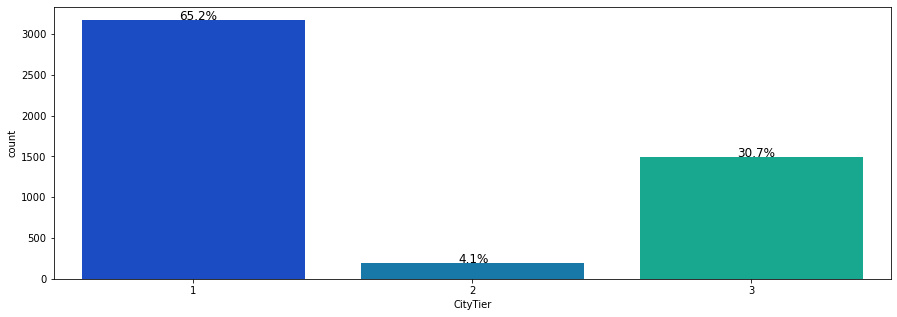

In [298]:
#CityTier Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["CityTier"],palette='winter')
perc_on_bar(ax,tourData["CityTier"])

no null values 

Tier 1 - 65.2%
Tier 2 - 4.1%
Tier 3 - 30.7%



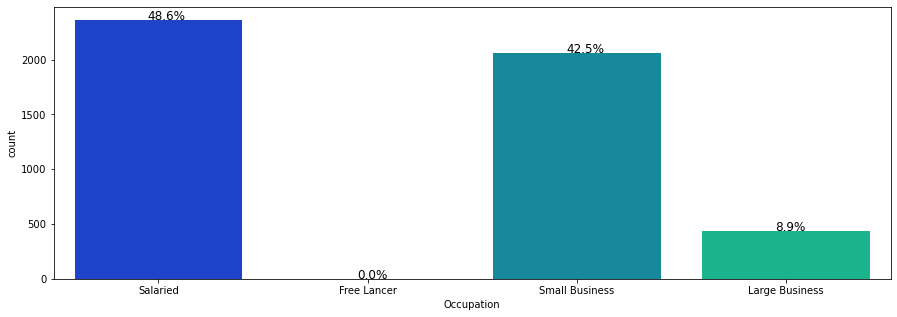

In [299]:
#Occupation Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["Occupation"],palette='winter')
perc_on_bar(ax,tourData["Occupation"])

Salaried - 48.6%
Free Lancer - 0.0%
Small Business - 42.5%
Large Business - 8.9% 

dropped free lancer's 

In [300]:
tourData.drop(tourData[tourData['Occupation'] == 'Free Lancer'].index, inplace = True)
tourData['Occupation'].value_counts()

Salaried          2361
Small Business    2064
Large Business     434
Name: Occupation, dtype: int64

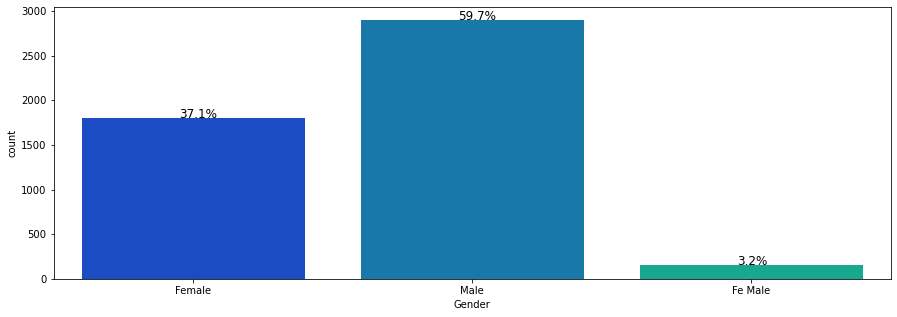

In [301]:
#Gender Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["Gender"],palette='winter')
perc_on_bar(ax,tourData["Gender"])

In [302]:
#replacing Fe Male with Female since this was a spelling error

tourData['Gender'] = tourData['Gender'].replace(['Fe Male'],'Female')



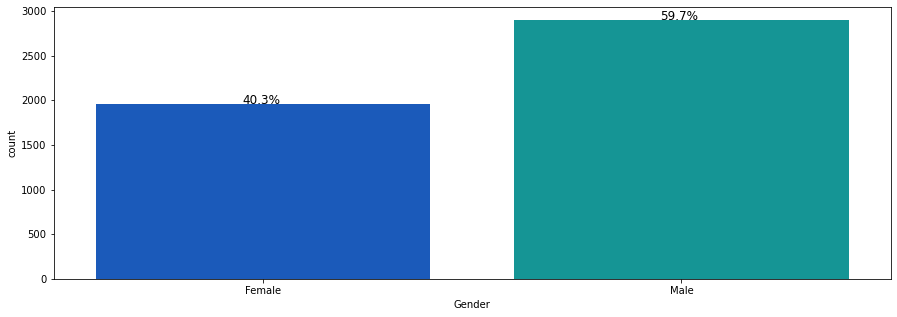

In [303]:
#More Males than Females
#40.3% females and 59.7% Male

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["Gender"],palette='winter')
perc_on_bar(ax,tourData["Gender"])

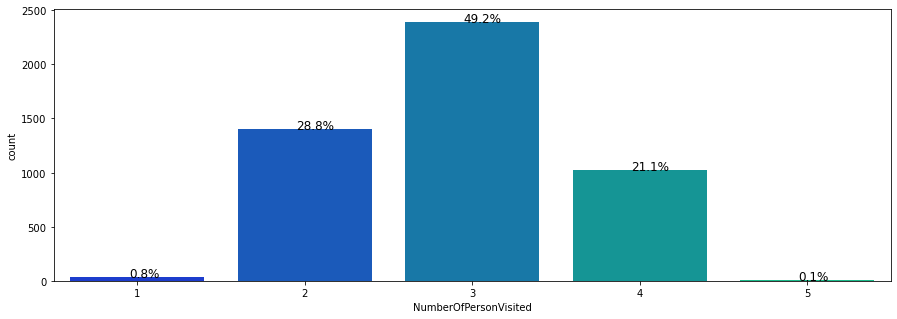

In [304]:
#NumberOfPersonVisited Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["NumberOfPersonVisited"],palette='winter')
perc_on_bar(ax,tourData["NumberOfPersonVisited"])

In [305]:
tourData.drop(tourData[tourData['NumberOfPersonVisited'] == 5].index, inplace = True)

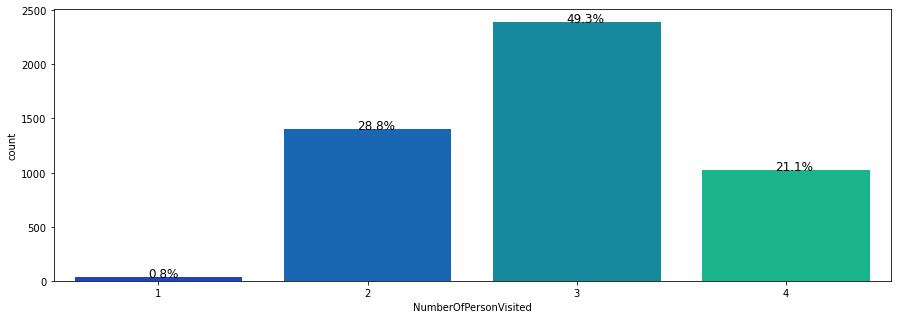

In [306]:

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["NumberOfPersonVisited"],palette='winter')
perc_on_bar(ax,tourData["NumberOfPersonVisited"])

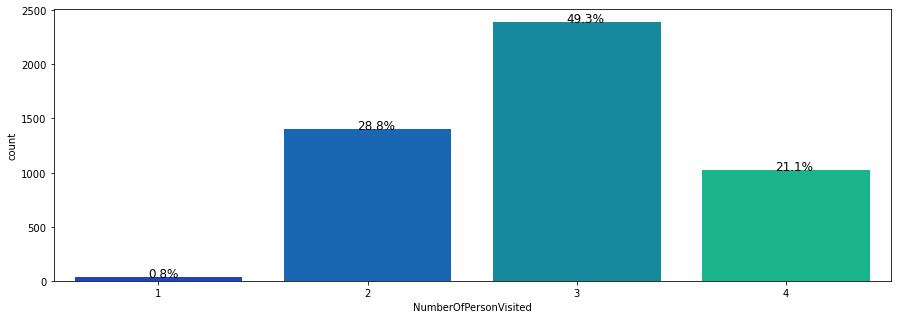

In [307]:
#NumberOfPersonVisited Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["NumberOfPersonVisited"],palette='winter')
perc_on_bar(ax,tourData["NumberOfFollowups"])

removed Number of Person Visted = 5 since they were 0.1%

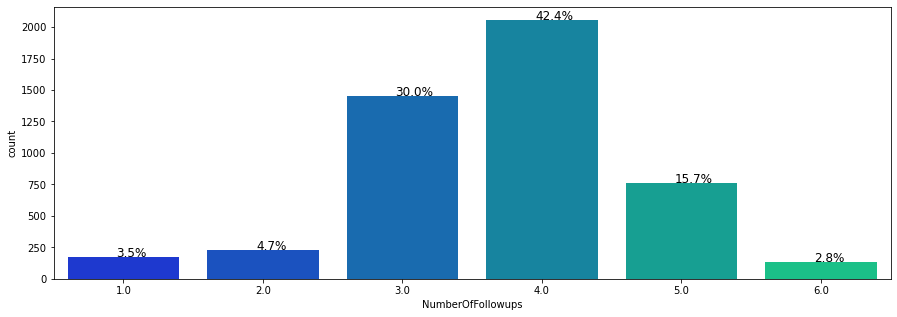

In [308]:
#NumberOfFollowups Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["NumberOfFollowups"],palette='winter')
perc_on_bar(ax,tourData["NumberOfFollowups"])

In [309]:
tourData.dropna(subset=['NumberOfFollowups'], inplace=True) #dropped null values

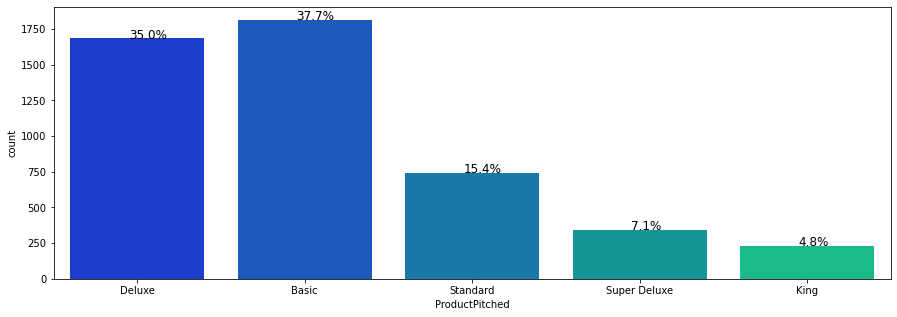

In [311]:
#ProductPitched Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["ProductPitched"],palette='winter')
perc_on_bar(ax,tourData["ProductPitched"])

no null values no need to clean data

Deluxe - 35% 
Basic - 37.7%
Standard Product Pitched - 15.4%
Super Deluxe - 7.1%
King - 4.8%


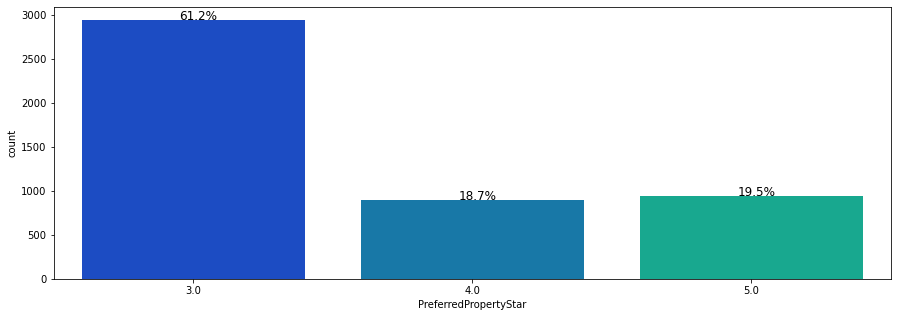

In [312]:
#PreferredPropertyStar Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["PreferredPropertyStar"],palette='winter')
perc_on_bar(ax,tourData["PreferredPropertyStar"])

In [313]:
tourData.dropna(subset=['PreferredPropertyStar'], inplace=True) #dropped null values

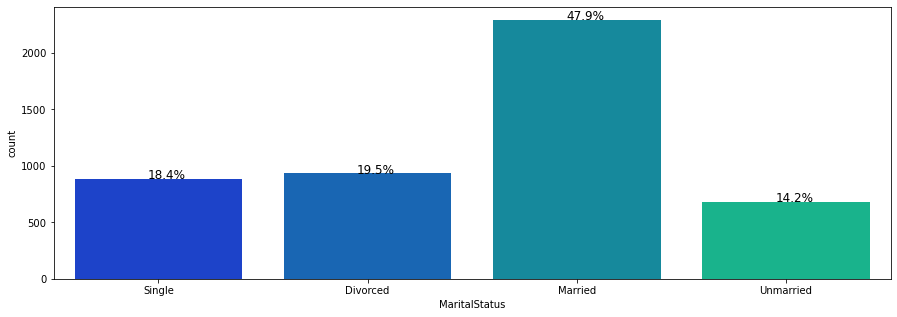

In [315]:
#MaritalStatus Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["MaritalStatus"],palette='winter')
perc_on_bar(ax,tourData["MaritalStatus"])

In [316]:
#replacing Unmarried with Single since this is redundant

tourData['MaritalStatus'] = tourData['MaritalStatus'].replace(['Unmarried'],'Single')


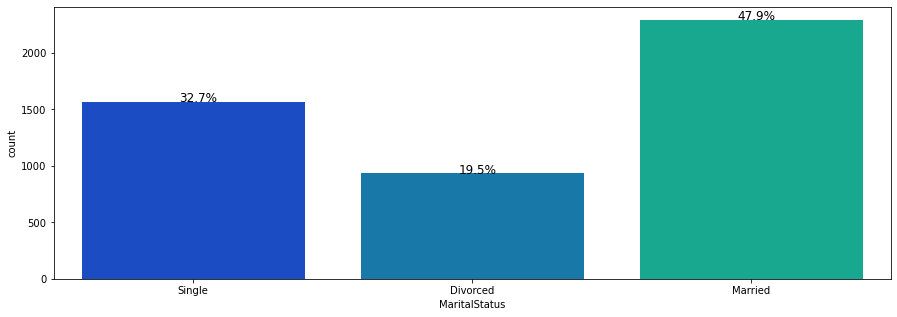

In [317]:
plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["MaritalStatus"],palette='winter')
perc_on_bar(ax,tourData["MaritalStatus"])

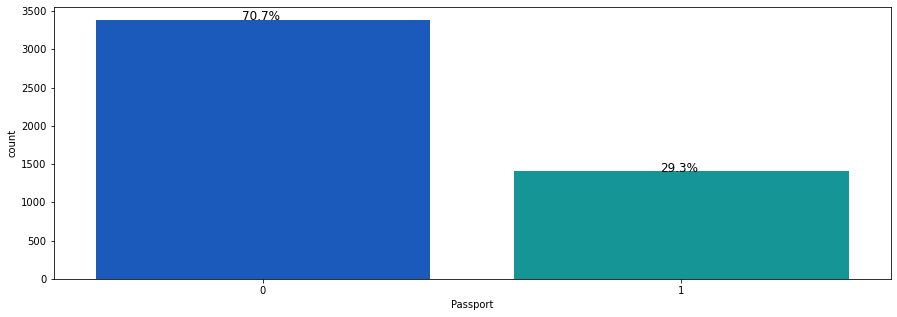

In [318]:
#Passport Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["Passport"],palette='winter')
perc_on_bar(ax,tourData["Passport"])

70.7% of people do not have a passport 
29.3% of people have a passport 

Good idea to target people with passports for travel abroad

No need to clean data 

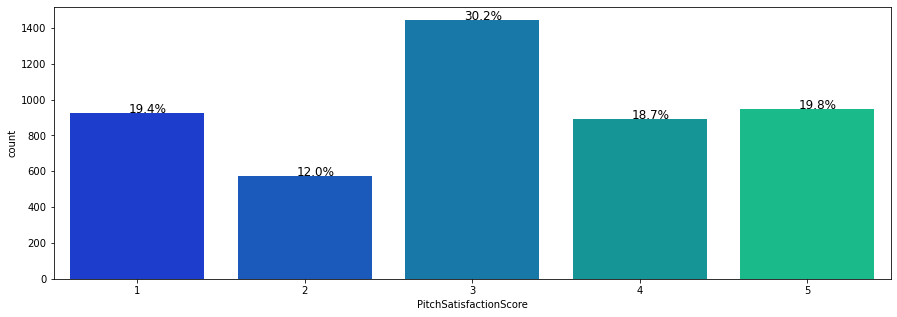

In [319]:
#PitchSatisfactionScore Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["PitchSatisfactionScore"],palette='winter')
perc_on_bar(ax,tourData["PitchSatisfactionScore"])

No need to clean data 

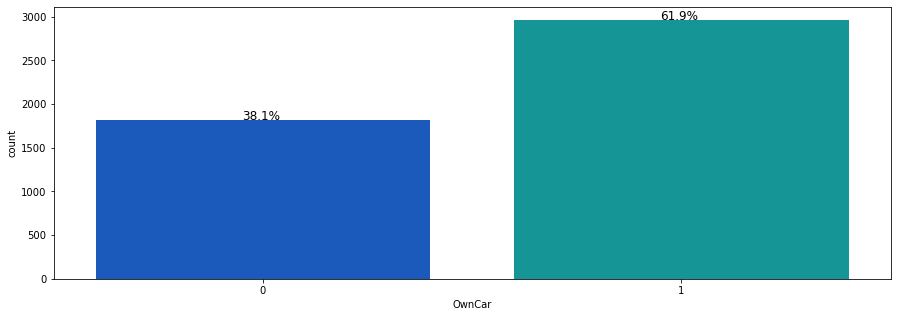

In [320]:
#OwnCar Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["OwnCar"],palette='winter')
perc_on_bar(ax,tourData["OwnCar"])

38.1% do not own a car 
61.9% own a car 

no null values - no need to clean data 

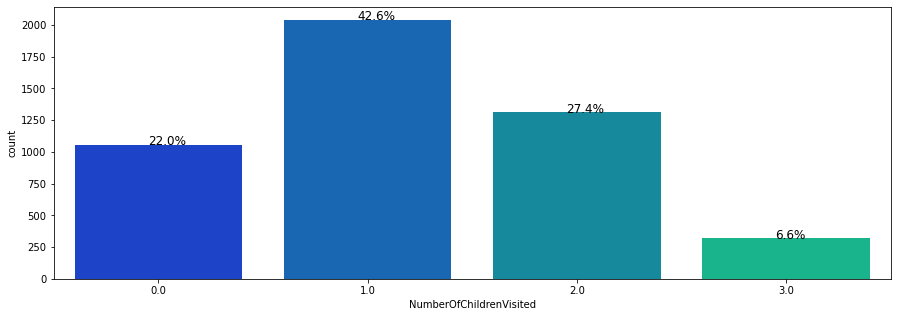

In [321]:
#NumberOfChildrenVisited Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["NumberOfChildrenVisited"],palette='winter')
perc_on_bar(ax,tourData["NumberOfChildrenVisited"])

In [322]:
#replacing null values with zero

tourData['NumberOfChildrenVisited'] = tourData['NumberOfChildrenVisited'].replace(np.nan, 0)

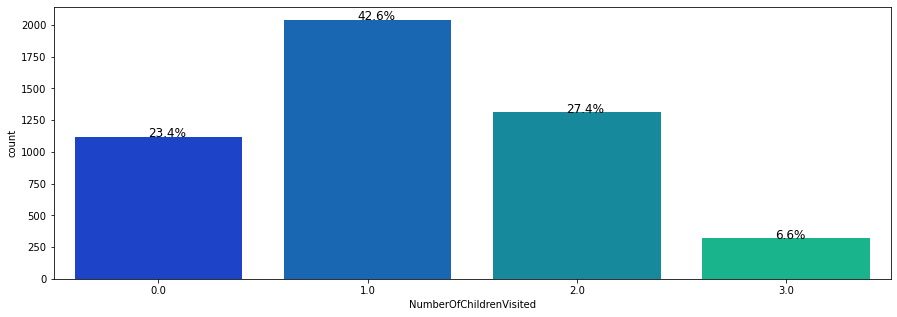

In [323]:
plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["NumberOfChildrenVisited"],palette='winter')
perc_on_bar(ax,tourData["NumberOfChildrenVisited"])

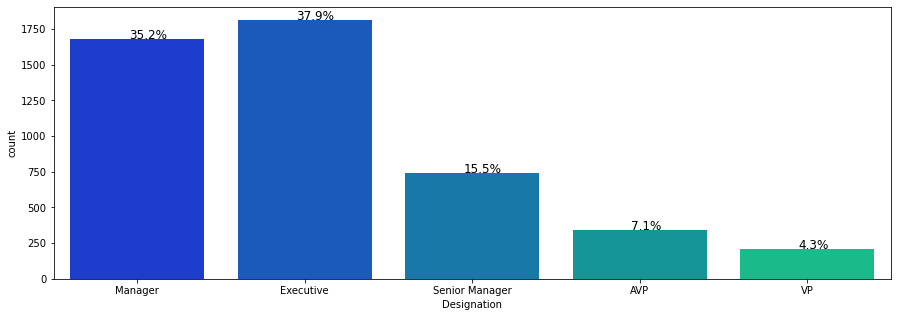

In [324]:
#Designation Observation

plt.figure(figsize=(15,5))
ax = sns.countplot(tourData["Designation"],palette='winter')
perc_on_bar(ax,tourData["Designation"])

no null values - no need to clean data 

**BIVARIATE ANALYSIS**

In [325]:
tourData = tourData.drop(['CustomerID'], axis=1)

#Dropping CustomerID since it does not provide any insight to the data

In [326]:


tourData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4786 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4786 non-null   int64  
 1   Age                      4786 non-null   float64
 2   TypeofContact            4786 non-null   object 
 3   CityTier                 4786 non-null   int64  
 4   DurationOfPitch          4786 non-null   float64
 5   Occupation               4786 non-null   object 
 6   Gender                   4786 non-null   object 
 7   NumberOfPersonVisited    4786 non-null   int64  
 8   NumberOfFollowups        4786 non-null   float64
 9   ProductPitched           4786 non-null   object 
 10  PreferredPropertyStar    4786 non-null   float64
 11  MaritalStatus            4786 non-null   object 
 12  NumberOfTrips            4786 non-null   float64
 13  Passport                 4786 non-null   int64  
 14  PitchSatisfactionScore  

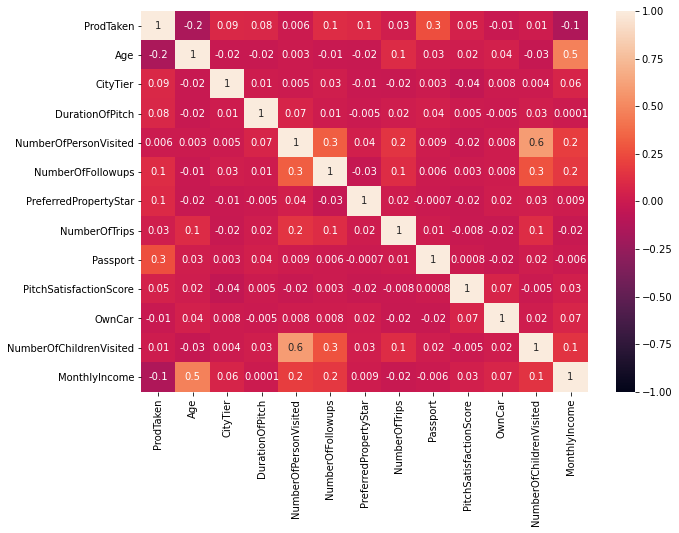

In [327]:
#plots heatmap showing correlations 

plt.figure(figsize=(10,7))
sns.heatmap(tourData.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()


ProdTaken is our most important feature
ProdTaken and Passport have the highest correlation of 0.3 



In [328]:
#pairplot of ProdTaken

#sns.pairplot(tourData,hue='ProdTaken')
#plt.show()

In [329]:
## function to plot boxplots w.rt quality
def boxplot(x):
    plt.figure(figsize=(7,5))
    sns.boxplot(tourData['ProdTakedn'],x,palette="PuBu")
    plt.show()

In [330]:
#boxplot(tourData['Age'])
tourData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4786 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4786 non-null   int64  
 1   Age                      4786 non-null   float64
 2   TypeofContact            4786 non-null   object 
 3   CityTier                 4786 non-null   int64  
 4   DurationOfPitch          4786 non-null   float64
 5   Occupation               4786 non-null   object 
 6   Gender                   4786 non-null   object 
 7   NumberOfPersonVisited    4786 non-null   int64  
 8   NumberOfFollowups        4786 non-null   float64
 9   ProductPitched           4786 non-null   object 
 10  PreferredPropertyStar    4786 non-null   float64
 11  MaritalStatus            4786 non-null   object 
 12  NumberOfTrips            4786 non-null   float64
 13  Passport                 4786 non-null   int64  
 14  PitchSatisfactionScore  

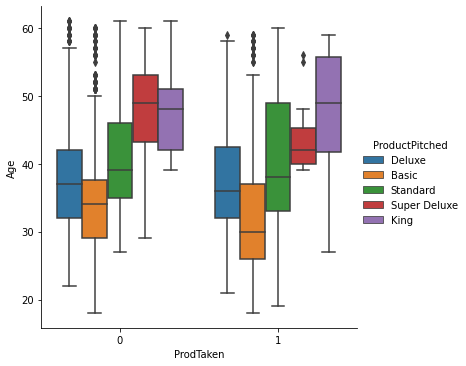

In [331]:
#Bivariate ProdTaken & Age

sns.catplot(x="ProdTaken",
            y = "Age",
            hue = 'ProductPitched',
           data = tourData,
           kind = 'box');

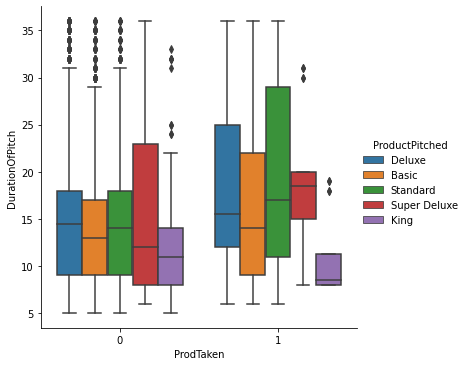

In [332]:
#ProdTaken and Duration of Pitch

sns.catplot(x="ProdTaken",
            y = "DurationOfPitch",
            hue = 'ProductPitched',
           data = tourData,
           kind = 'box');

#Deluxe 12-25 min 
#Basic 8 - 23 min 
#Standard 12- 28 min
#Super Deluxe 15-20 min
#king 7-13 min

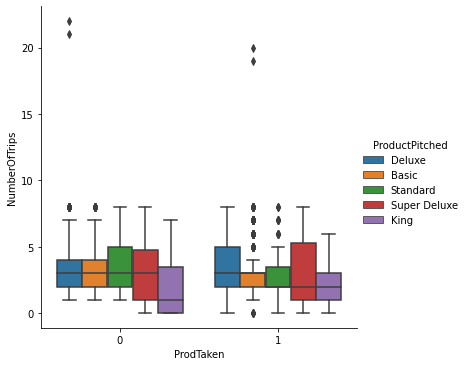

In [333]:
#NumberOfTrips and Duration of Pitch

sns.catplot(x="ProdTaken",
            y = "NumberOfTrips",
            hue = 'ProductPitched',
           data = tourData,
           kind = 'box');

#Deluxe 2-5
#Basic 2-3 
#Standard 2-4
#Super Deluxe 1-5
#king 1-2

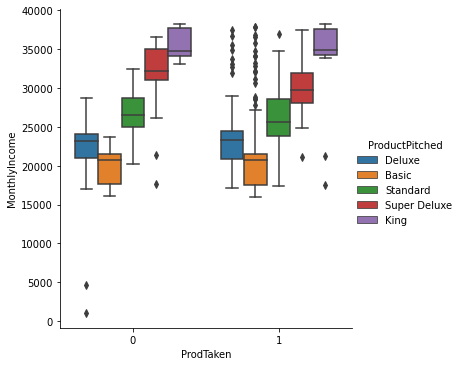

In [334]:
#MonthlyIncome and Duration of Pitch

sns.catplot(x="ProdTaken",
            y = "MonthlyIncome",
            hue = 'ProductPitched',
           data = tourData,
           kind = 'box');

#Deluxe 22000-25000
#Basic 17000-22000 
#Standard 24000-28000
#Super Deluxe 28000-33000
#king 35000-38000

##Customer Profile 

**will use the 25th and 75th estimates of bivariate graph of  customers who purchased a product to create profiles for each package**



Deluxe -
    Age  - Early thirty to early fourty 
    Duration of Pitch - Deluxe 12-25 min
    Number of Trips - 2-5
    Monthly Income - 22000-25000
    
Basic - 
    Age - mid 20's to mid 30's
    Duration of Pitch - 8 - 23 min 
    Number of Trips - 2-3
    Monthly Income - 17000-22000 
Standard -
    Age - mid 30s to 50
    Duration of Pitch - 12- 28 min
    Number of Trips - 2-4
    Monthly Income - 24000-28000

Super Deluxe - 
    Age - 40's
    Duration of Pitch - Super Deluxe 15-20 min
    Number of Trips - 1-5
    Monthly Income - 28000-33000

King - 
    Age - early 40s to mid 50s
    Duration of Pitch - king 7-13 min
    Number of Trips - 1-2
    Monthly Income - 35000-38000

## PREPARING DATA FOR MODEL

In [335]:


#converting object type data into numerical 

for feature in tourData.columns: # Loop through all columns in the dataframe
    if tourData[feature].dtype == 'object': # Only apply for columns with categorical strings
        tourData[feature] = pd.Categorical(tourData[feature])# Replace strings with an integer
tourData.head(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,0,32.000000,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,0,59.000000,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,0,30.000000,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,0,38.000000,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Single,1.0,0,3,0,0.0,Senior Manager,24526.0
9,0,36.000000,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0
10,0,35.000000,Self Enquiry,1,22.0,Small Business,Male,2,2.0,Basic,4.0,Divorced,1.0,0,3,1,1.0,Executive,17426.0


In [336]:
tourData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4786 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ProdTaken                4786 non-null   int64   
 1   Age                      4786 non-null   float64 
 2   TypeofContact            4786 non-null   category
 3   CityTier                 4786 non-null   int64   
 4   DurationOfPitch          4786 non-null   float64 
 5   Occupation               4786 non-null   category
 6   Gender                   4786 non-null   category
 7   NumberOfPersonVisited    4786 non-null   int64   
 8   NumberOfFollowups        4786 non-null   float64 
 9   ProductPitched           4786 non-null   category
 10  PreferredPropertyStar    4786 non-null   float64 
 11  MaritalStatus            4786 non-null   category
 12  NumberOfTrips            4786 non-null   float64 
 13  Passport                 4786 non-null   int64   
 14  PitchSat

In [337]:
print(tourData.TypeofContact.value_counts())
print(tourData.Occupation.value_counts())
print(tourData.Gender.value_counts())
print(tourData.ProductPitched.value_counts())
print(tourData.MaritalStatus.value_counts())
print(tourData.Designation.value_counts())




Self Enquiry       3386
Company Invited    1400
Name: TypeofContact, dtype: int64
Salaried          2324
Small Business    2032
Large Business     430
Name: Occupation, dtype: int64
Male      2856
Female    1930
Name: Gender, dtype: int64
Basic           1814
Deluxe          1683
Standard         740
Super Deluxe     342
King             207
Name: ProductPitched, dtype: int64
Married     2291
Single      1563
Divorced     932
Name: MaritalStatus, dtype: int64
Executive         1814
Manager           1683
Senior Manager     740
AVP                342
VP                 207
Name: Designation, dtype: int64


In [338]:
replaceStruct = {
                "TypeofContact":     {"Self Enquiry": 1, "Company Invited": 2},
                "Occupation": {"Salaried": 1, "Small Business":2 , "Large Business": 3},
                 "Gender": {"Male": 1, "Female":2 },
                 "ProductPitched":     {"Basic": 1, "Deluxe": 2, "Standard":3, "Super Deluxe":4, "King":5},
                "MaritalStatus":     {"Married": 1, "Single": 2, "Divorced":740 },
                "Designation":     {"Executive": 1, "Manager": 2, "Senior Manager": 3, "AVP": 4, "VP":207 },
                
                    }
#oneHotCols=["purpose","housing","other_credit","job"]




In [339]:
tourData=tourData.replace(replaceStruct)

In [340]:
tourData.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.000000,1,3,6.0,1,2,3,3.0,2,3.0,2,1.0,1,2,1,0.0,2,20993.0
1,0,49.000000,2,1,14.0,1,1,3,4.0,2,4.0,740,2.0,0,3,1,2.0,2,20130.0
3,0,33.000000,2,1,9.0,1,2,2,3.0,1,3.0,740,2.0,1,5,1,1.0,1,17909.0
4,0,37.622265,1,1,8.0,2,1,2,3.0,1,4.0,740,1.0,0,5,1,0.0,1,18468.0
5,0,32.000000,2,1,8.0,1,1,3,3.0,1,3.0,2,1.0,0,5,1,1.0,1,18068.0


removing features that dont make sense including in the model such as Customer interaction data since these can only be obtained post pitch and will not predict if the lead will convert to a customer

In [341]:
tourData = tourData.drop(['DurationOfPitch', 'PitchSatisfactionScore','NumberOfPersonVisited', 'NumberOfFollowups', 'NumberOfChildrenVisited'], axis=1)


## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built  on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

In [342]:
X = tourData.drop("ProdTaken" , axis=1)
y = tourData.pop("ProdTaken")

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [344]:
y.value_counts(1)

0    0.811743
1    0.188257
Name: ProdTaken, dtype: float64

In [345]:
y_test.value_counts(1)

0    0.811978
1    0.188022
Name: ProdTaken, dtype: float64

In [346]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [347]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [348]:
##BUILD DECISION TREE

In [349]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1)

In [350]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

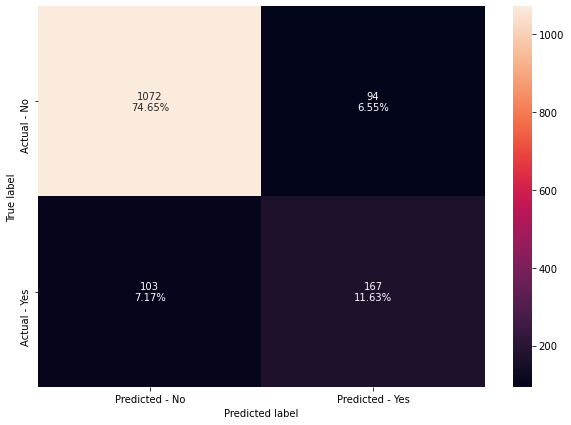

In [351]:
make_confusion_matrix(dtree,y_test)

In [352]:
decision_tree_score=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8628133704735376
Recall on training set :  1.0
Recall on test set :  0.6185185185185185
Precision on training set :  1.0
Precision on test set :  0.6398467432950191


Decision tree is overfitted in training data; Performs well on test set

### Bagging Clasmsifier

In [353]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

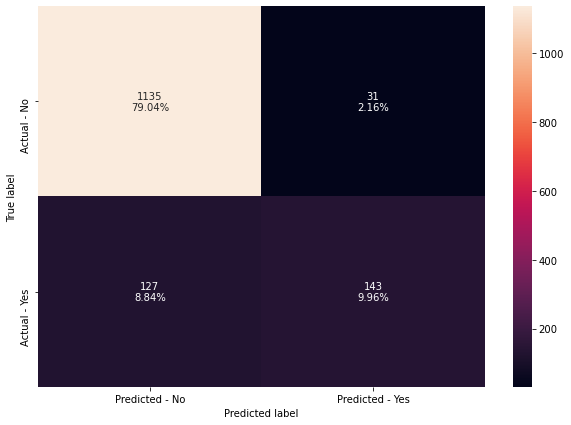

In [354]:
make_confusion_matrix(bagging,y_test)

In [355]:
bagging_clas_score=get_metrics_score(bagging)

Accuracy on training set :  0.9916417910447761
Accuracy on test set :  0.8899721448467967
Recall on training set :  0.9603803486529319
Recall on test set :  0.5296296296296297
Precision on training set :  0.9950738916256158
Precision on test set :  0.8218390804597702


Bagging Classifer performs better than Decision Tree and has less overfit in training set

### RANDOM FOREST 

In [356]:
rf = RandomForestClassifier(random_state=1,class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

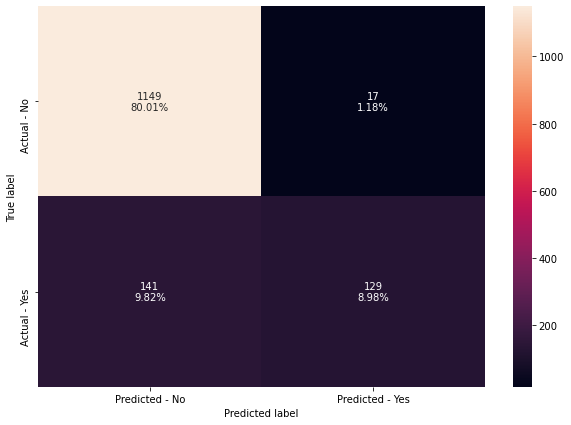

In [357]:
make_confusion_matrix(rf,y_test)

In [358]:
ran_for_score=get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.8899721448467967
Recall on training set :  1.0
Recall on test set :  0.4777777777777778
Precision on training set :  1.0
Precision on test set :  0.8835616438356164


Random Forrest performs well but is overfitting 

Decision Tree, Bagging Classifier, and Random Forrest performed well but are overfitting Data 

## Tuning Models 

In [359]:
#TUNING DECISION TREE

In [360]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(3,28), 
              'min_samples_leaf': [1, 1, 4, 6, 10],
              'max_leaf_nodes' : [2, 4, 6, 12,14],
              'min_impurity_decrease': [0.00001,0.0001,0.001,0.01,0.1]
             }


# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=14,
                       min_impurity_decrease=1e-05, random_state=1)

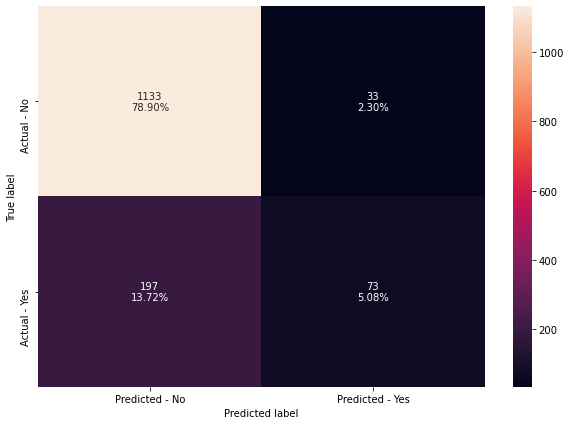

In [361]:
make_confusion_matrix(dtree_estimator,y_test)

In [362]:
#confusion matrix of decision tree using gridsearch 

In [363]:
dtree_estimator_score=get_metrics_score(dtree_estimator)

Accuracy on training set :  0.8531343283582089
Accuracy on test set :  0.8398328690807799
Recall on training set :  0.329635499207607
Recall on test set :  0.27037037037037037
Precision on training set :  0.7509025270758123
Precision on test set :  0.6886792452830188


## TUNING BAGGING CLASSIFIER 

In [365]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,14,49,99],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, cv = 5,n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 14, 49, 99]})

In [366]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.9, n_estimators=99, random_state=1)

In [367]:
tuned_bagging_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.8969359331476323
Recall on training set :  1.0
Recall on test set :  0.5259259259259259
Precision on training set :  1.0
Precision on test set :  0.8765432098765432


In [368]:
#test set improved, but there is more overfit on training set

## TUNING RANDOM FOREST

In [370]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True)

# Grid of parameters to choose from
parameters = {  
                'max_features': ['sqrt','log2','auto'],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 18, 5),
                'n_estimators': list(np.linspace(10, 50, 10, dtype = int))}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=41, oob_score=True,
                       random_state=1)

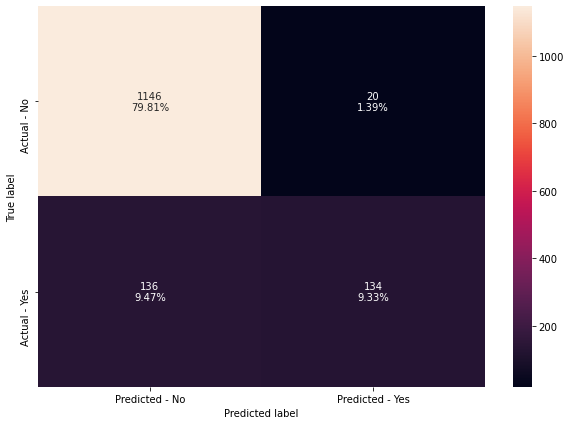

In [371]:
make_confusion_matrix(rf_estimator,y_test)

In [372]:
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  0.9994029850746269
Accuracy on test set :  0.8913649025069638
Recall on training set :  0.9968304278922345
Recall on test set :  0.4962962962962963
Precision on training set :  1.0
Precision on test set :  0.8701298701298701


## ADABOOST CLASSIFIER 

In [373]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

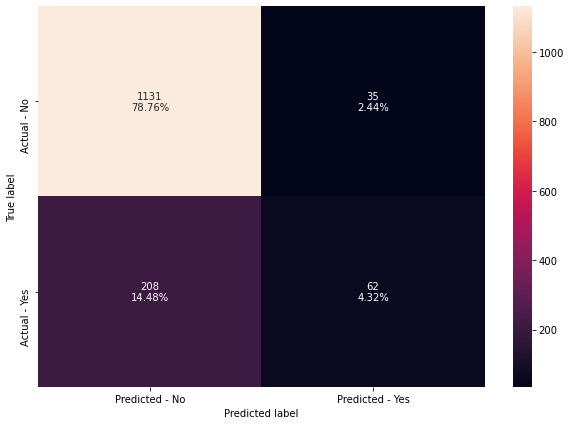

In [374]:
make_confusion_matrix(abc,y_test)

In [375]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8471641791044776
Accuracy on test set :  0.8307799442896936
Recall on training set :  0.294770206022187
Recall on test set :  0.22962962962962963
Precision on training set :  0.7351778656126482
Precision on test set :  0.6391752577319587


In [376]:
#this does not have overfit

## Gradient Boosting Classifier

In [377]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

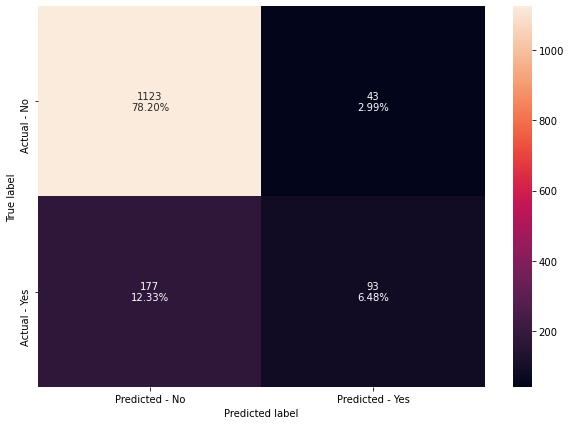

In [378]:
make_confusion_matrix(gbc,y_test)

In [379]:
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8874626865671642
Accuracy on test set :  0.8467966573816156
Recall on training set :  0.48811410459587956
Recall on test set :  0.34444444444444444
Precision on training set :  0.850828729281768
Precision on test set :  0.6838235294117647


In [380]:
#better performance than ADABOOST and does not overfit 

## XGBoost Classifier 

In [381]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

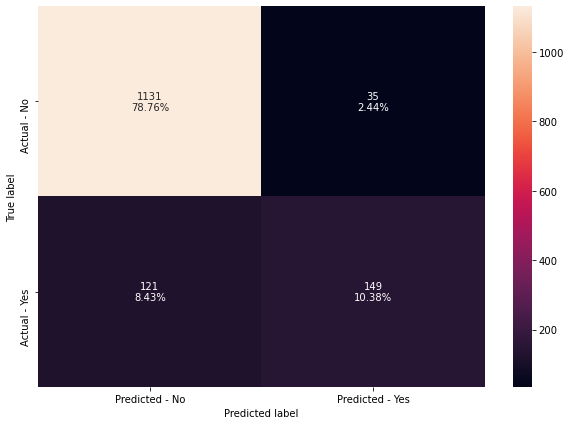

In [382]:
make_confusion_matrix(xgb,y_test)

In [383]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9946268656716418
Accuracy on test set :  0.8913649025069638
Recall on training set :  0.9730586370839936
Recall on test set :  0.5518518518518518
Precision on training set :  0.9983739837398374
Precision on test set :  0.8097826086956522


In [384]:
#performs well but is overfitting 

## Hyperparameter Tuning 

### AdaBoost Classifier

In [385]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.8, n_estimators=100, random_state=1)

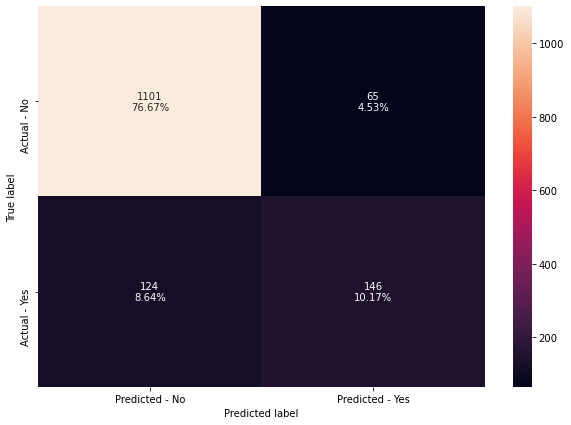

In [386]:
make_confusion_matrix(abc_tuned,y_test)

In [387]:
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9737313432835821
Accuracy on test set :  0.8683844011142061
Recall on training set :  0.8938193343898574
Recall on test set :  0.5407407407407407
Precision on training set :  0.9641025641025641
Precision on test set :  0.6919431279620853


## Gradient Boost Classifier

In [388]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

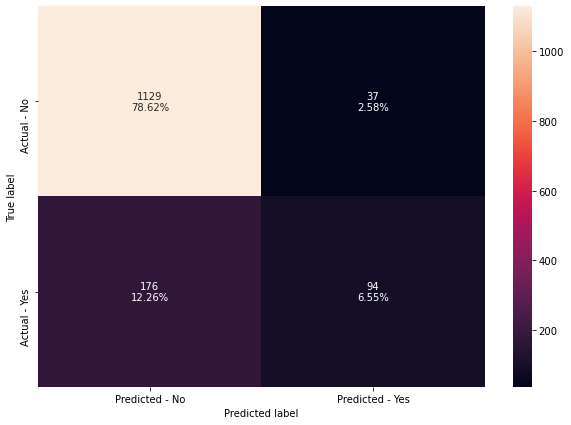

In [389]:
make_confusion_matrix(gbc_init,y_test)

In [390]:
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8859701492537313
Accuracy on test set :  0.8516713091922006
Recall on training set :  0.4722662440570523
Recall on test set :  0.34814814814814815
Precision on training set :  0.8587896253602305
Precision on test set :  0.7175572519083969


In [391]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations


# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=1)

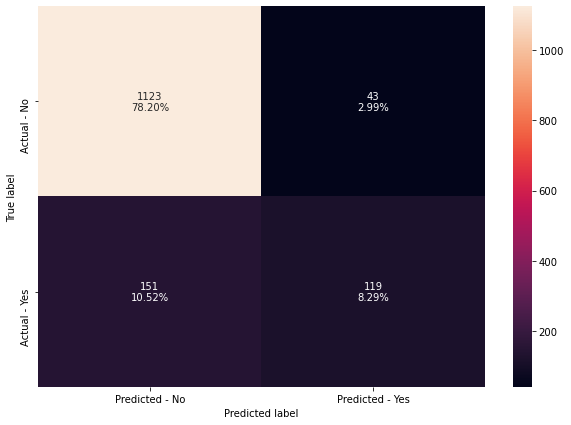

In [392]:
make_confusion_matrix(gbc_tuned,y_test)

In [402]:
gbc_tuned_score = get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9083582089552239
Accuracy on test set :  0.8649025069637883
Recall on training set :  0.589540412044374
Recall on test set :  0.44074074074074077
Precision on training set :  0.8857142857142857
Precision on test set :  0.7345679012345679


## XGBOOST CLASSIFIER 

In [395]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(30,100,20),
    "subsample":[0.5,0.7,1],
    "learning_rate":[0.001,0.01,0.05,0.1],
    "colsample_bytree":[0.5,0.7,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [396]:
# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

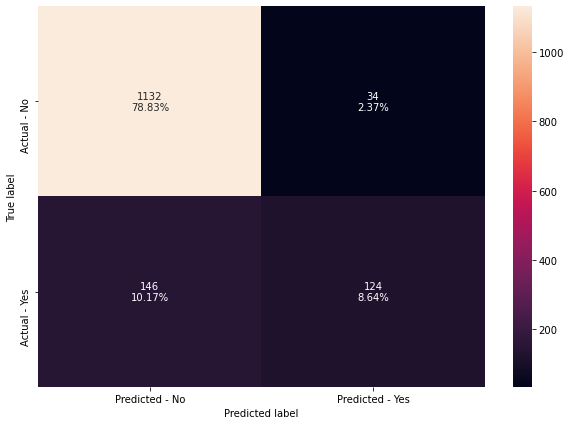

In [397]:
make_confusion_matrix(xgb_tuned,y_test)

In [398]:
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9492537313432836
Accuracy on test set :  0.8746518105849582
Recall on training set :  0.7480190174326465
Recall on test set :  0.45925925925925926
Precision on training set :  0.9772256728778468
Precision on test set :  0.7848101265822784


In [399]:
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_estimator,rf,rf_estimator,abc,gbc,xgb,abc_tuned,gbc_init,gbc_tuned,xgb_tuned]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test =[]
precision_train =[]
precision_test =[]

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [400]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Tuned Bagging Classifier',
                                          'Random Forest','Tuned Random Forest','Adaboost Classifier',
                                          'Gradient Boosting Classifier','XGBoost classifier',
                                          'Tuned Adaboost Classifier','Gradient Boosting Classifier with Adaboost'
                                          ,'Tuned Gradient Boosting Classifier',
                                          'Tuned XGBoost Classifier'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test, 
                                          'train_Recall': recall_train,      
                                          'Test_Recall': recall_test,
                                          'Train_Precision':precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.862813,1.000000,0.618519,1.000000,0.639847
1,Tuned Decision Tree,0.853134,0.839833,0.329635,0.270370,0.750903,0.688679
2,Bagging Classifier,0.991642,0.889972,0.960380,0.529630,0.995074,0.821839
3,Tuned Bagging Classifier,1.000000,0.896936,1.000000,0.525926,1.000000,0.876543
4,Random Forest,1.000000,0.889972,1.000000,0.477778,1.000000,0.883562
5,Tuned Random Forest,0.999403,0.891365,0.996830,0.496296,1.000000,0.870130
6,Adaboost Classifier,0.847164,0.830780,0.294770,0.229630,0.735178,0.639175
7,Gradient Boosting Classifier,0.887463,0.846797,0.488114,0.344444,0.850829,0.683824
8,XGBoost classifier,0.994627,0.891365,0.973059,0.551852,0.998374,0.809783
9,Tuned Adaboost Classifier,0.973731,0.868384,0.893819,0.540741,0.964103,0.691943


***All models performed well but Gradient Boosting Classifer with AdaBoost generalizes the data the best***

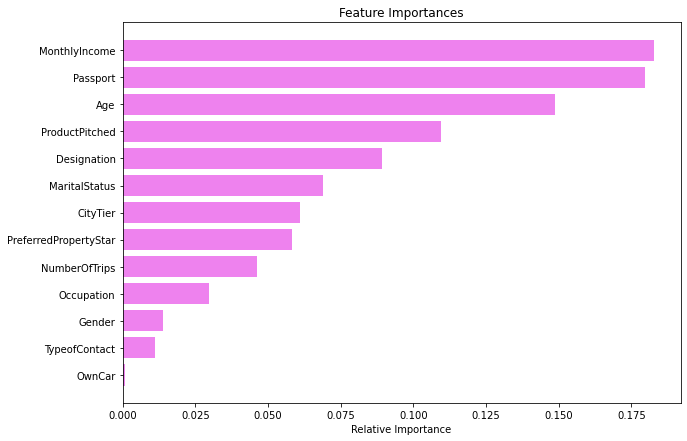

In [404]:
feature_names = X_train.columns
importances = gbc_init.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Insights and recommendations

* Some features were removed from the model since they could only be obtained after a pitch was made and do not help us predict if a lead would convert to a client; these features were: 'DurationOfPitch', 'PitchSatisfactionScore','NumberOfPersonVisited', 'NumberOfFollowups', 'NumberOfChildrenVisited'

* The top 5 features are Monthly Income, Passport, Product Pitched, Designation, Martial Status

* Product Pitched was amoing the most important features, meaning it is important to profile the correct customer to each package. 

* From EDA a customer profile was built as following:
    **Used the 25th and 75th estimates of bivariate graph of  customers who purchased a product to create profiles for each package**
    

Deluxe -
    Age  - Early thirty to early fourty 
    Duration of Pitch - Deluxe 12-25 min (sales recommendation)
    Number of Trips - 2-5
    Monthly Income - 22000-25000
    
Basic - 
    Age - mid 20's to mid 30's
    Duration of Pitch - 8 - 23 min (sales recommendation)
    Number of Trips - 2-3
    Monthly Income - 17000-22000 

Standard -
    Age - mid 30s to 50
    Duration of Pitch - 12- 28 min (sales recommendation)
    Number of Trips - 2-4
    Monthly Income - 24000-28000

Super Deluxe - 
    Age - 40's
    Duration of Pitch - Super Deluxe 15-20 min (sales recommendation)
    Number of Trips - 1-5
    Monthly Income - 28000-33000

King - 
    Age - early 40s to mid 50s
    Duration of Pitch - king 7-13 min (sales recommendation)
    Number of Trips - 1-2
    Monthly Income - 35000-38000

* The Models that were created to predict if a lead will convert into a customer when offered a new "Wellness Package", we should try and get more data specific wealness and health to further improve our model in the future. 

* We want to make an effective marketing campaign and target the correct customers, so the False Positive rate is the most important since ad money is being spent on leads that will not convert into customers.

* False Negatives are less important since no money is being spent on targeting this group, but are still being converted into customers.

* Since False Postitives are of high important and False Negatives are not, Precision is the most important metric since Precision = TP/TP+FP

* This model can be used for future leads and know if the company should spend resources to convert them into customers. As more data is gathered, analysis can be made on the False Positives which can help improving the model in futures iterations.

* More data should be gathered from customers such as lifestyle preferences to further profile leads into different packages 

* In this model, some features were removed since some of the data can only be obtained after a pitch/sale, but we can also create another model up "upsell" or "upgrade" exsisting clients to another package. 

* Models performed well but since we had to choose one, the one with the least amount of overfit was chosen. A better apporach would be to combine all models into one using "ensemble" methods. Overfit would not be an issue since combining the models would aggregatedly fix the overfit of any one model. 